In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [3]:
data = pd.read_csv('iris-dataset.csv')
data[:11]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


<function matplotlib.pyplot.show(*args, **kw)>

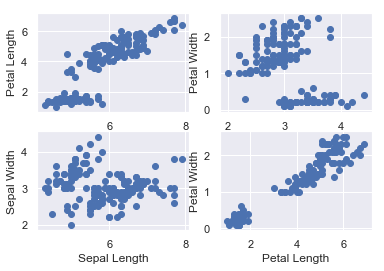

In [4]:
plt.subplot(221)
plt.scatter(data['sepal_length'],data['petal_length'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.subplot(222)
plt.scatter(data['sepal_width'],data['petal_width'])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.subplot(223)
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(224)
plt.scatter(data['petal_length'],data['petal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


plt.show

## using iloc for sepal and petal length

In [20]:
x = data.iloc[:,[0,2]]
x[:6]

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7


In [21]:
kmeans = KMeans(2)
kmeans.fit(x)
clusters = x.copy()
clusters['clusters_predicted'] = kmeans.fit_predict(x)
clusters[:10]

,sepal_length,petal_length,clusters_predicted
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


Text(0, 0.5, 'Petal Length')

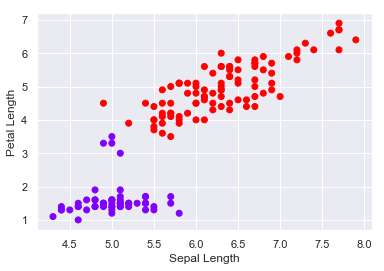

In [23]:
plt.scatter(data['sepal_length'],data['petal_length'],c=clusters['clusters_predicted'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

### Standardizing

Text(0, 0.5, 'Petal Length')

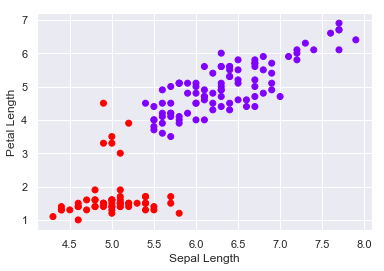

In [25]:
x_scaled = x.copy()
x_scaled = preprocessing.scale(x)
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)
clusters_scaled = x.copy()
clusters_scaled['Standard_cluster'] = kmeans_scaled.fit_predict(x_scaled)
plt.scatter(data['sepal_length'],data['petal_length'],c=clusters_scaled['Standard_cluster'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

#### There's a very slight difference here
### let's try to calculate WCSS and check by taking 10 as arbitrary clusters

In [26]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[566.0320666666667,
 112.96262731481481,
 53.801351193126536,
 34.31442077922078,
 25.63146450956451,
 21.92311212861213,
 18.323205046520265,
 14.960833542188809,
 13.493230719763325]

Text(0, 0.5, 'WCSS')

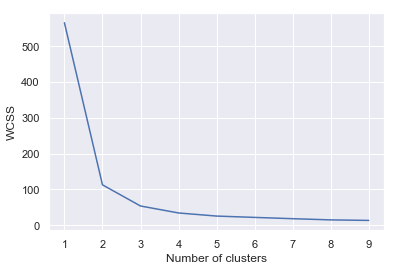

In [27]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### By The Elbow Method we will check for K = 2 and k = 3

Text(0, 0.5, 'Petal Length')

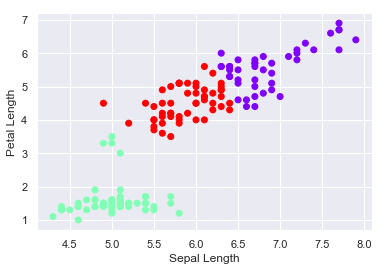

In [28]:
x_scaled = x.copy()
x_scaled = preprocessing.scale(x)
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)
clusters_scaled = x.copy()
clusters_scaled['Standard_cluster'] = kmeans_scaled.fit_predict(x_scaled)
plt.scatter(data['sepal_length'],data['petal_length'],c=clusters_scaled['Standard_cluster'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

Text(0, 0.5, 'Petal Length')

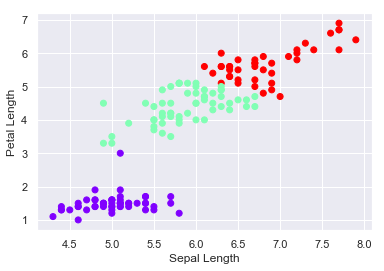

In [29]:
kmeans = KMeans(3)
kmeans.fit(x)
clusters = x.copy()
clusters['clusters_predicted'] = kmeans.fit_predict(x)
plt.scatter(data['sepal_length'],data['petal_length'],c=clusters['clusters_predicted'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

## Clustering for Sepal length and Sepal Width

In [30]:
x = data.iloc[:,0:2]
x[:6]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9


### not standardised data

Text(0, 0.5, 'Sepal Width')

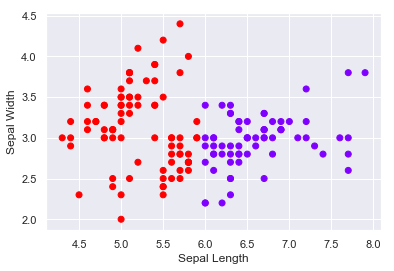

In [31]:
kmeans = KMeans(2)
kmeans.fit(x)
clusters = x.copy()
clusters['clusters_predicted'] = kmeans.fit_predict(x)
plt.scatter(data['sepal_length'],data['sepal_width'],c=clusters['clusters_predicted'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

### vertically separated so we'll use standardization

Text(0, 0.5, 'Sepal Width')

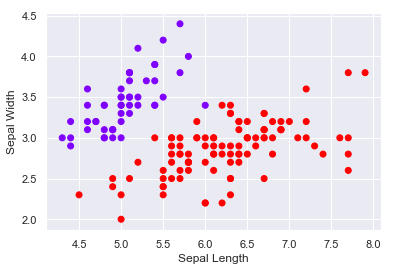

In [32]:
x_scaled = x.copy()
x_scaled = preprocessing.scale(x)
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)
clusters_scaled = x.copy()
clusters_scaled['Standard_cluster'] = kmeans_scaled.fit_predict(x_scaled)
plt.scatter(data['sepal_length'],data['sepal_width'],c=clusters_scaled['Standard_cluster'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

### Checking with k = 3

Text(0, 0.5, 'Sepal Width')

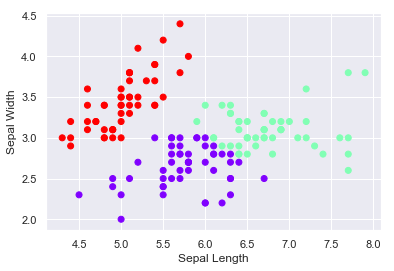

In [33]:
x_scaled = x.copy()
x_scaled = preprocessing.scale(x)
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)
clusters_scaled = x.copy()
clusters_scaled['Standard_cluster'] = kmeans_scaled.fit_predict(x_scaled)
plt.scatter(data['sepal_length'],data['sepal_width'],c=clusters_scaled['Standard_cluster'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Working with real iris Dataset

In [56]:
real_data = pd.read_csv('iris-with-answers.csv')
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [58]:
real_data['species'] = real_data['species'].map({'setosa':0,'versicolor':1,'virginica':2})
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### We know there are 3 classes so we'll take k = 3

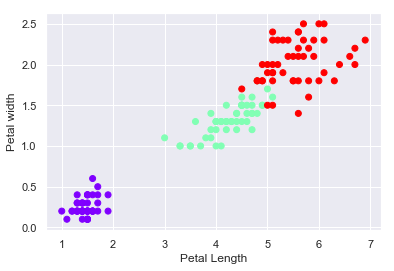

In [61]:
plt.scatter(real_data['petal_length'],real_data['petal_width'],c=real_data['species'],cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.show()

### Standardize

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


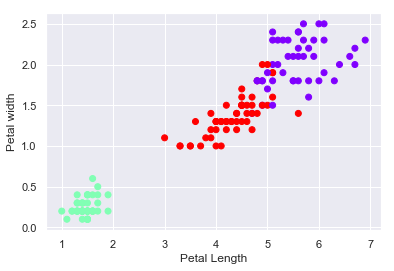

In [63]:
data_stan = preprocessing.scale(real_data)
kmeans_real_stan = KMeans(3)
kmeans_real_stan.fit(data_stan)
clusters_stan = real_data.copy()
clusters_stan['cluster'] = kmeans_real_stan.fit_predict(data_stan)
plt.scatter(real_data['petal_length'],real_data['petal_width'],c=clusters_stan['cluster'],cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.show()

### Standardizing the data doesn't give us much improvement